Importar librerías

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

Carga de datos

In [2]:

data_path = 'data/wdbc.data'
columns = ['ID', 'Diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 
           'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 
           'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']
df = pd.read_csv(data_path, header=None, names=columns)
df.sample(5)

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
319,894335,B,12.43,17.00,78.60,477.3,0.07557,0.03454,0.01342,0.01699,...,12.90,20.21,81.76,515.9,0.08409,0.04712,0.02237,0.02832,0.1901,0.05932
198,877486,M,19.18,22.49,127.50,1148.0,0.08523,0.14280,0.11140,0.06772,...,23.36,32.06,166.40,1688.0,0.13220,0.56010,0.38650,0.17080,0.3193,0.09221
426,907409,B,10.48,14.98,67.49,333.6,0.09816,0.10130,0.06335,0.02218,...,12.13,21.57,81.41,440.4,0.13270,0.29960,0.29390,0.09310,0.3020,0.09646
129,866674,M,19.79,25.12,130.40,1192.0,0.10150,0.15890,0.25450,0.11490,...,22.63,33.58,148.70,1589.0,0.12750,0.38610,0.56730,0.17320,0.3305,0.08465
270,8910721,B,14.29,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,...,14.91,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120


Total valores nulos o NA

In [3]:
df.isnull().sum().sum()

0

Eliminación de la columna ID

In [4]:
df.drop(['ID'], axis=1, inplace=True)

Codificación de etiquetas (M = maligno, B = benigno) a números -->

In [5]:
labelencoder_Y = LabelEncoder()
df['Diagnosis'] = labelencoder_Y.fit_transform(df['Diagnosis'])

Separación de las características y etiquetas

In [6]:
X = df.drop(['Diagnosis'], axis=1)
y = df['Diagnosis']

Normalización de las características

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

División del conjunto de datos en entrenamiento y prueba

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Implementación de Modelos

In [9]:
models = {
    "Regresión Logística": LogisticRegression(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier()
}

Entrenamiento y predicción

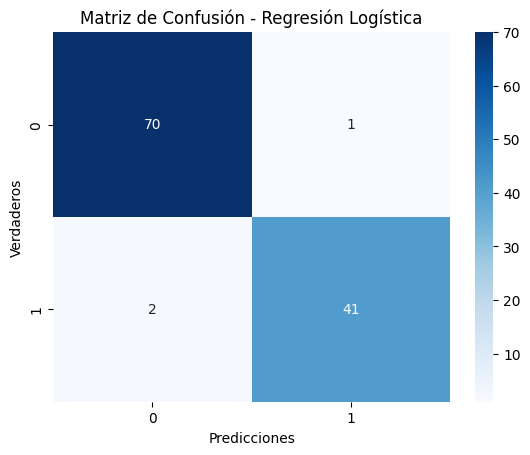

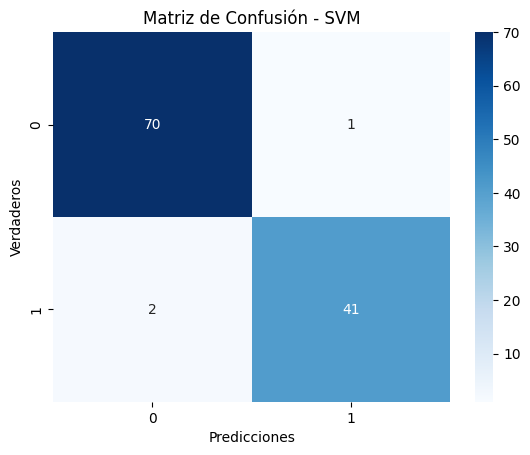

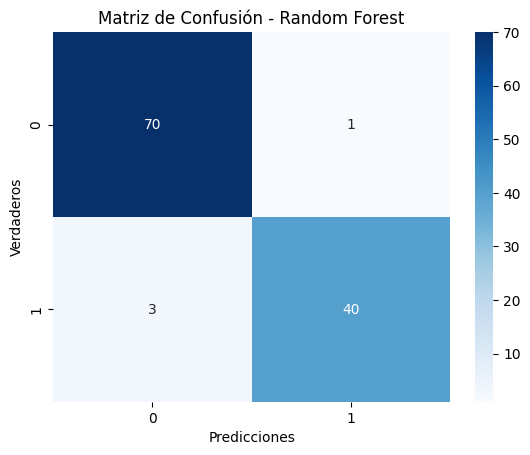

In [10]:
# Lista para almacenar las métricas de cada modelo
results = []

# Entrenamiento y predicción
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    probas = model.predict_proba(X_test)[:, 1]
    
    # Matriz de confusión
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de Confusión - {name}")
    plt.ylabel('Verdaderos')
    plt.xlabel('Predicciones')
    plt.show()
    
    # Calculamos las métricas de evaluación
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']
    auc_score = roc_auc_score(y_test, probas)
    
    # Agregamos los resultados al listado
    results.append({"Modelo": name, "Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-Score": f1, "AUC": auc_score})

Resumen de métricas por cada modelo

In [11]:
# Creamos un DataFrame con los resultados
results_df = pd.DataFrame(results)

# Mostramos la tabla de resultados
print(results_df)

                Modelo  Accuracy  Precision    Recall  F1-Score       AUC
0  Regresión Logística  0.973684   0.973719  0.973684  0.973621  0.997380
1                  SVM  0.973684   0.973719  0.973684  0.973621  0.997380
2        Random Forest  0.964912   0.965205  0.964912  0.964738  0.995414
